# This Notebook aims to determine and check the details of vaccination on among countries

<img src= "https://wwwassets.rand.org/content/rand/blog/2020/08/its-going-to-be-the-vaccination-stupid/jcr:content/par/blogpost.aspectcrop.868x455.lt.jpg/x1598055738172.jpg.pagespeed.ic.WPm0htSOxE.jpg" style='width: 900px;'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# Import the Dataset

In [3]:
df= pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


# Data Description
1. country = The name of the country
2. iso_code = ISO code for the country
3. Date = Date for the data entry
4. Total number of vaccinations = This is the absolute number of total vaccinations in the country
5. Total number of people vaccinated = The number of people vaccinated.
6. Total number of people fully vaccinated = The number of people fully vaccinated(may be 2-3 doses).
7. Daily vaccinations (raw) = For a certain data entry, the number of vaccination for that date/country
8. Daily vaccinations = for a certain data entry, the number of vaccination for that date/country;
9. Total vaccinations per hundred = ratio (in percent) between vaccination number and total population up to the date in the country;
10. Total number of people vaccinated per hundred = ratio (in percent) between population immunized and total population up to the date in the country;
11. Total number of people fully vaccinated per hundred = ratio (in percent) between population fully immunized and total population up to the date in the country;
12. Number of vaccinations per day = number of daily vaccination for that day and country
13. Daily vaccinations per million = ratio (in ppm) between vaccination number and total population for the current date in the country
14. Vaccines used in the country = total number of vaccines used in the country (up to date);
15. Source name = source of the information (national authority, international organization, local organization etc.);
16. Source website = website of the source of information;

In [4]:
# Let's check the information in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24620 entries, 0 to 24619
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              24620 non-null  object 
 1   iso_code                             24620 non-null  object 
 2   date                                 24620 non-null  object 
 3   total_vaccinations                   13858 non-null  float64
 4   people_vaccinated                    13060 non-null  float64
 5   people_fully_vaccinated              10392 non-null  float64
 6   daily_vaccinations_raw               11461 non-null  float64
 7   daily_vaccinations                   24389 non-null  float64
 8   total_vaccinations_per_hundred       13858 non-null  float64
 9   people_vaccinated_per_hundred        13060 non-null  float64
 10  people_fully_vaccinated_per_hundred  10392 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
# Check the NULL VAlues
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     10762
people_vaccinated                      11560
people_fully_vaccinated                14228
daily_vaccinations_raw                 13159
daily_vaccinations                       231
total_vaccinations_per_hundred         10762
people_vaccinated_per_hundred          11560
people_fully_vaccinated_per_hundred    14228
daily_vaccinations_per_million           231
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
#converting date to date
df['date'] = pd.to_datetime(df['date'])

# 1. Total Vaccinations among Countries? What country has vaccinated more people?

In [7]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [8]:
df["people_vaccinated"]= df.groupby("country").total_vaccinations.tail(1)
vaccination_country=df.groupby("country")["people_vaccinated"].mean().sort_values(ascending= False).head(10).reset_index()

In [9]:
vaccination_country

,country,people_vaccinated
0,China,904134000.0
1,United States,310645827.0
2,India,252760364.0
3,Brazil,78906225.0
4,United Kingdom,71672208.0
5,Germany,60735326.0
6,England,60243055.0
7,France,44304266.0
8,Italy,42734542.0
9,Mexico,37521976.0


In [10]:
# Top 10 Countries with hishest number of total vaccination
top_10=df.groupby("country")["people_vaccinated"].mean().sort_values(ascending= False).head(10).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Country","Total vaccinations"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['country'],top_10['people_vaccinated']],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['country'],
                y=top_10['people_vaccinated'],
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 Countries with highest number of total vaccination',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# 2. Which country has most number of Fully Vaccinated People?

In [11]:
fully_vaccinated=df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(10).reset_index()

In [12]:
fully_vaccinated

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,144919339.0
2,India,47189318.0
3,United Kingdom,29973779.0
4,England,25391916.0
5,Brazil,23679758.0
6,Germany,21812429.0
7,Mexico,15062873.0
8,France,14371963.0
9,Russia,14332077.0


In [13]:
top_10=df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(10).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["country","people_fully_vaccinated"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['country'].head(10),top_10['people_fully_vaccinated'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['country'].head(10),
                y=top_10['people_fully_vaccinated'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 Countries with number of fully vaccinated people',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# 3. Ratio between people_vaccinated vs fully vaccinated in different country
Here we have taken some specific countries like China, India, US, UK

In [14]:
people_vaccinated=vaccination_country.query('country in ["United States","India", "China" , "United Kingdom"]')
fully_vaccinated_sp=fully_vaccinated.query('country in ["United States", "India", "China" , "United Kingdom"]')

In [15]:
people_vaccinated

,country,people_vaccinated
0,China,904134000.0
1,United States,310645827.0
2,India,252760364.0
4,United Kingdom,71672208.0


In [16]:
fully_vaccinated_sp

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,144919339.0
2,India,47189318.0
3,United Kingdom,29973779.0


In [17]:
fully_vaccinated_sp['ratio']=fully_vaccinated_sp['people_fully_vaccinated'].values/people_vaccinated['people_vaccinated'].values

In [18]:
fully_vaccinated_sp

,country,people_fully_vaccinated,ratio
0,China,223299000.0,0.246976
1,United States,144919339.0,0.466510
2,India,47189318.0,0.186696
3,United Kingdom,29973779.0,0.418206


In [19]:
px.bar(fully_vaccinated_sp,x='country',y='ratio')

From thr above graph we can say that in US there is a good ratio between total no. of people get vaccinated vs fully vaccinated people, in India there are still many people need to be get fully vaccinated.

# 4. Trace the daily vaccinations dynamic?

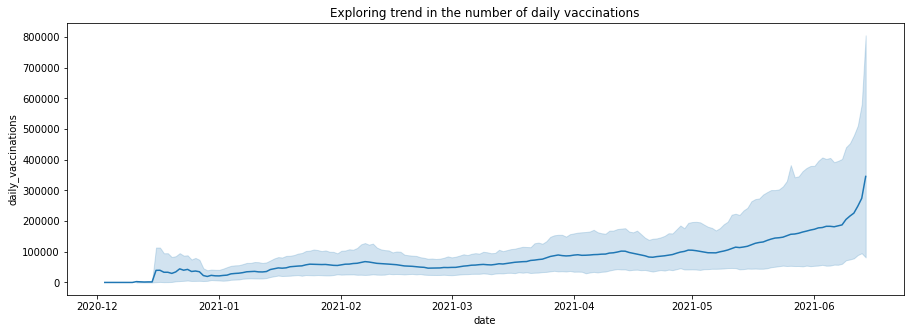

In [20]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations",data= df)
plt.title("Exploring trend in the number of daily vaccinations")
plt.show()

From this above figure we can sat that the vaccination starts increase in the month of february, may be caused by the second peak pf coronavirus

# 5. From which month based on countries vaccination procedure go on rapidly?

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations_per_million'>

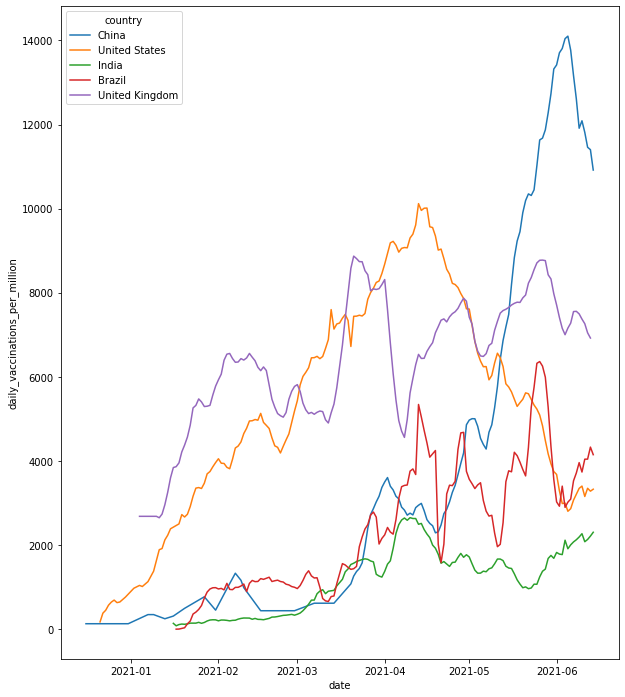

In [21]:
countries = df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['country'] == country])
sns.lineplot(top_countries['date'], 
             top_countries['daily_vaccinations_per_million'], 
             hue= top_countries['country'], ci= False)

As we can see fromthe above graph that every country except US, increase thier vaccination procedure, some countries like India has some decrease in graph in the month of may(may be people at that time due to second wave can't able to get the vaccination also shortage of vaccination also can be a factor), but after may in the month of june onwards it's again increased

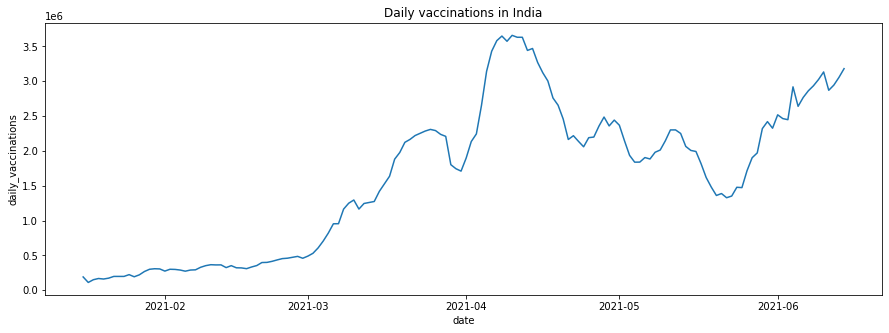

In [22]:
plt.figure(figsize= (15,5))
# In India
sns.lineplot(x= "date",y= "daily_vaccinations",data= df[df.country== "India"])
plt.title("Daily vaccinations in India")
plt.show()

# 6. What is the country that vaccinated completely most of the population?

In [23]:
population_country=df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(10).reset_index()

In [24]:
population_country

,country,total_vaccinations_per_hundred
0,Gibraltar,231.01
1,United Arab Emirates,140.02
2,Seychelles,139.51
3,Malta,133.51
4,Cayman Islands,131.94
5,Saint Helena,130.00
6,San Marino,128.19
7,Falkland Islands,126.53
8,Israel,122.79
9,Bermuda,120.20


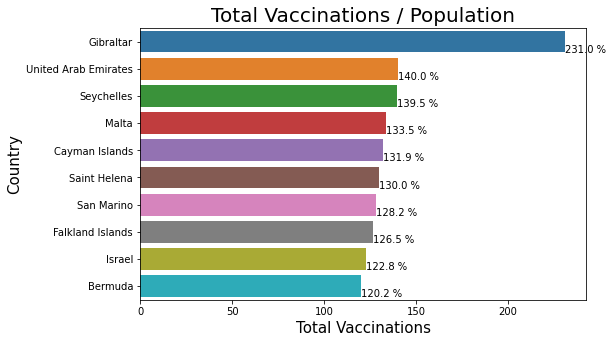

In [25]:
plt.figure(figsize= (8, 5))

ax = sns.barplot(data=population_country, y= 'country', x= 'total_vaccinations_per_hundred')

plt.title('Total Vaccinations / Population', size= 20)
plt.xlabel('Total Vaccinations', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

# 7. What country has immunized the largest percent from its population?

In [26]:
population_people_vaccination=df.groupby('country')['people_vaccinated_per_hundred'].max().sort_values(ascending=False).head(10).reset_index()

In [27]:
population_people_vaccination

,country,people_vaccinated_per_hundred
0,Gibraltar,116.15
1,Malta,77.01
2,Falkland Islands,75.57
3,Isle of Man,73.10
4,Seychelles,71.85
5,Saint Helena,71.83
6,Cayman Islands,71.41
7,Wales,70.29
8,Nauru,68.65
9,Canada,65.07


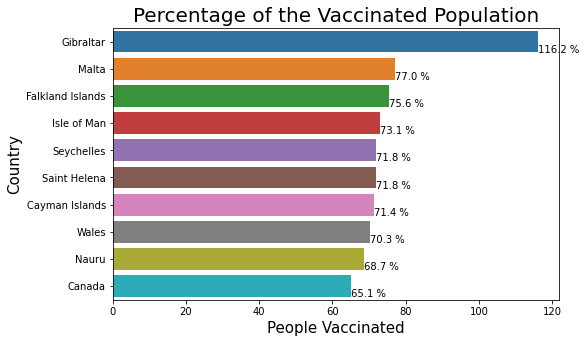

In [28]:
plt.figure(figsize= (8, 5))

ax = sns.barplot(data=population_people_vaccination, y= 'country', x= 'people_vaccinated_per_hundred')

plt.title('Percentage of the Vaccinated Population', size= 20)
plt.xlabel('People Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

# 8. What is the vaccine used in the largest number of countries?

In [29]:
df['vaccines'].value_counts()

Oxford/AstraZeneca                                                                    4130
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         3314
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2107
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1739
Moderna, Pfizer/BioNTech                                                              1514
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                     1289
Pfizer/BioNTech                                                                       1061
Oxford/AstraZeneca, Sinopharm/Beijing                                                 1030
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           986
Oxford/AstraZeneca, Sputnik V                                                          527
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                                479

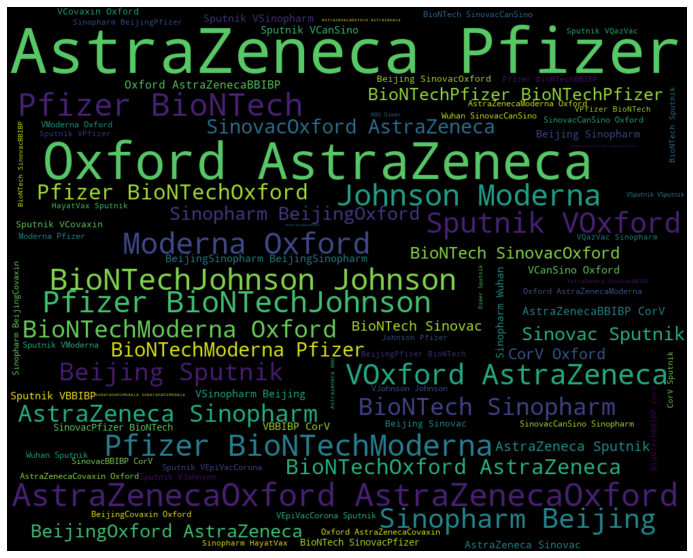

In [30]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,10))
all_words = "".join(df["vaccines"])
wc = WordCloud(stopwords=STOPWORDS, 
                 background_color="black",
               max_words=2000, max_font_size=280,
               random_state=42, width=1000,
               height=800).generate(all_words)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

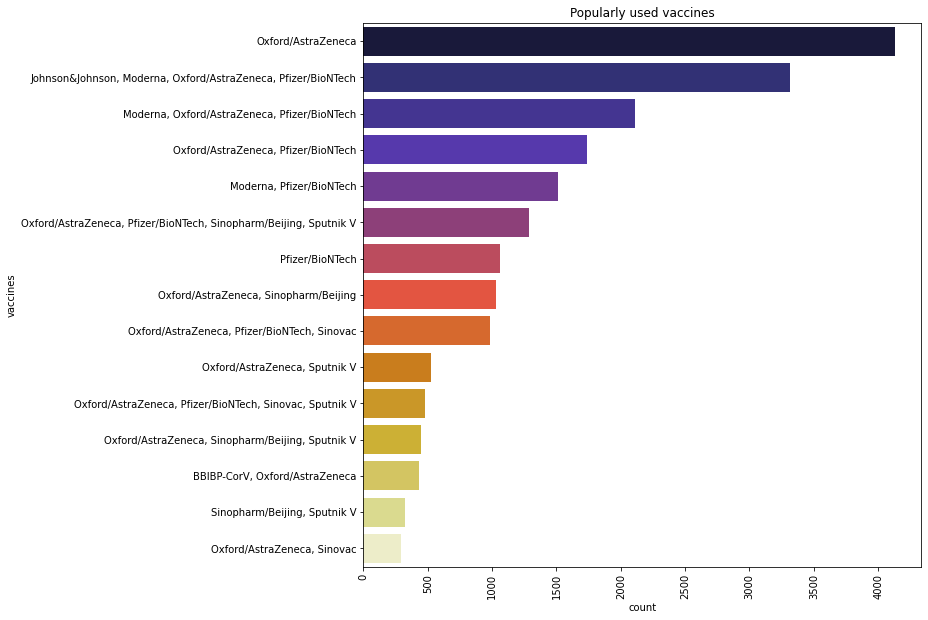

In [31]:
plt.figure(figsize=[10,10])
sns.countplot(y=df.vaccines,palette='CMRmap',
             order=df['vaccines'].value_counts().head(15).index)
plt.title("Popularly used vaccines")
plt.xticks(rotation=90);

From this above graph we can get that the most used vaccines are oxford/AstraZeneca and Pfizer

# 9. What vaccination schemes (combination of vaccines) are used and in which countries?

In [32]:
df.groupby('country')['vaccines'].value_counts().sort_values(ascending=False)

country                          vaccines                                                      
Norway                           Moderna, Pfizer/BioNTech                                          194
Scotland                         Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                      186
Canada                           Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                      183
Russia                           EpiVacCorona, Sputnik V                                           182
China                            CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac              182
                                                                                                  ... 
Burkina Faso                     Oxford/AstraZeneca                                                 13
Vanuatu                          Oxford/AstraZeneca                                                  8
Bonaire Sint Eustatius and Saba  Moderna, Pfizer/BioNTech                       

so here we can see some countries using some of the mixed vaccines, like norway is using modrena as well as pfizer

<AxesSubplot:xlabel='country,vaccines'>

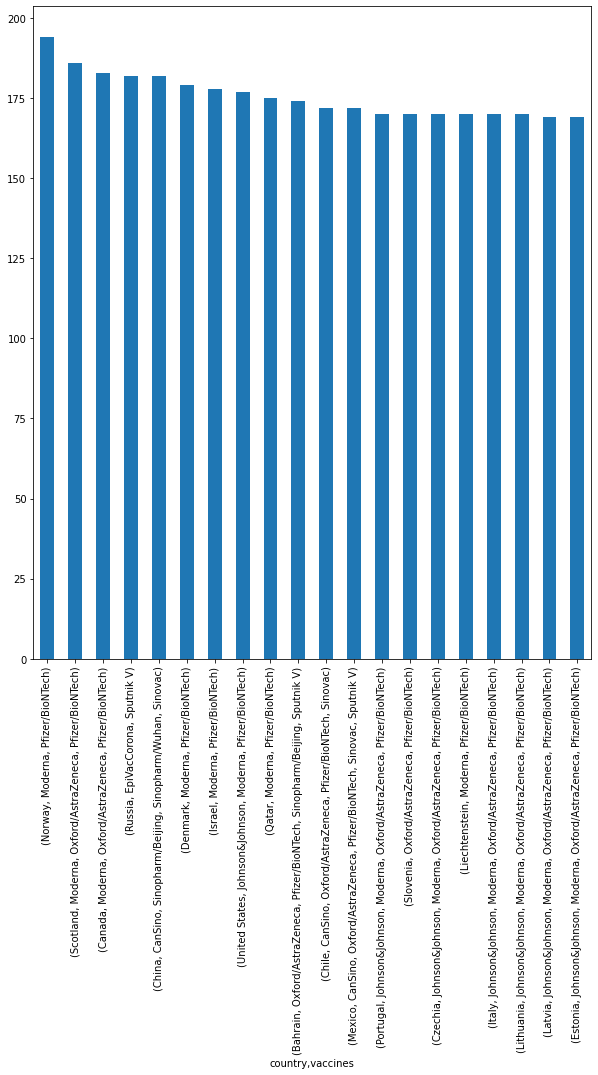

In [33]:
df.groupby('country')['vaccines'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

# 10. Which country prefers what vaccine?

In [34]:
vaccines = df.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()
vaccines

,vaccines,country
0,"Abdala, Soberana02",[Cuba]
1,BBIBP-CorV,[Chad]
2,"BBIBP-CorV, Moderna, Oxford/AstraZeneca, Sputn...",[Congo]
3,"BBIBP-CorV, Oxford/AstraZeneca","[Cameroon, Mauritania, Niger, Senegal, Sierra ..."
4,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",[Afghanistan]
5,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTec...",[Sudan]
6,"BBIBP-CorV, Oxford/AstraZeneca, Sinovac",[Somalia]
7,"BBIBP-CorV, Oxford/AstraZeneca, Sinovac, Sputn...",[Egypt]
8,"BBIBP-CorV, Sputnik V",[Venezuela]
9,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Chile]
